## Project: AARRR Analysis

### 문제 1. 데이터 로드

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from scipy.stats import shapiro

In [49]:
df1 = pd.read_excel('./online_retail_II.xlsx', sheet_name = 'Year 2009-2010')
df2 = pd.read_excel('./online_retail_II.xlsx', sheet_name = 'Year 2010-2011')
df = pd.concat([df1, df2], ignore_index = True)
print(df.shape)
df.head(5)

(1067371, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### 문제 2. 데이터 전처리

In [53]:
df['InvocieDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.dropna(subset = ['Customer ID'])
df.astype({'Customer ID':'int'}).dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID             int32
Country                object
InvocieDate    datetime64[ns]
dtype: object

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
 8   InvocieDate  824364 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 62.9+ MB


In [55]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID,InvocieDate
count,824364.000000,824364,824364.000000,824364.000000,824364
mean,12.414574,2011-01-01 22:29:28.042054144,3.676800,15324.638504,2011-01-01 22:29:28.042054144
min,-80995.000000,2009-12-01 07:45:00,0.000000,12346.000000,2009-12-01 07:45:00
25%,2.000000,2010-07-06 11:58:00,1.250000,13975.000000,2010-07-06 11:58:00
50%,5.000000,2010-12-03 14:26:00,1.950000,15255.000000,2010-12-03 14:26:00
75%,12.000000,2011-07-27 15:14:00,3.750000,16797.000000,2011-07-27 15:14:00
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,2011-12-09 12:50:00
std,188.976099,NaN,70.241388,1697.464450,NaN


In [56]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
InvocieDate    0
dtype: int64

In [57]:
df.sort_values('InvoiceDate')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvocieDate
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 07:45:00
...,...,...,...,...,...,...,...,...,...
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,2011-12-09 12:50:00
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,2011-12-09 12:50:00
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09 12:50:00
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,2011-12-09 12:50:00


In [58]:
df['Total'] = df['Quantity'] * df['Price']
df.head(3)

C:\Users\User\AppData\Local\Temp\ipykernel_7040\13745631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df['Quantity'] * df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvocieDate,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,81.0


### 문제 3. 나라별 구매 인원 시각화

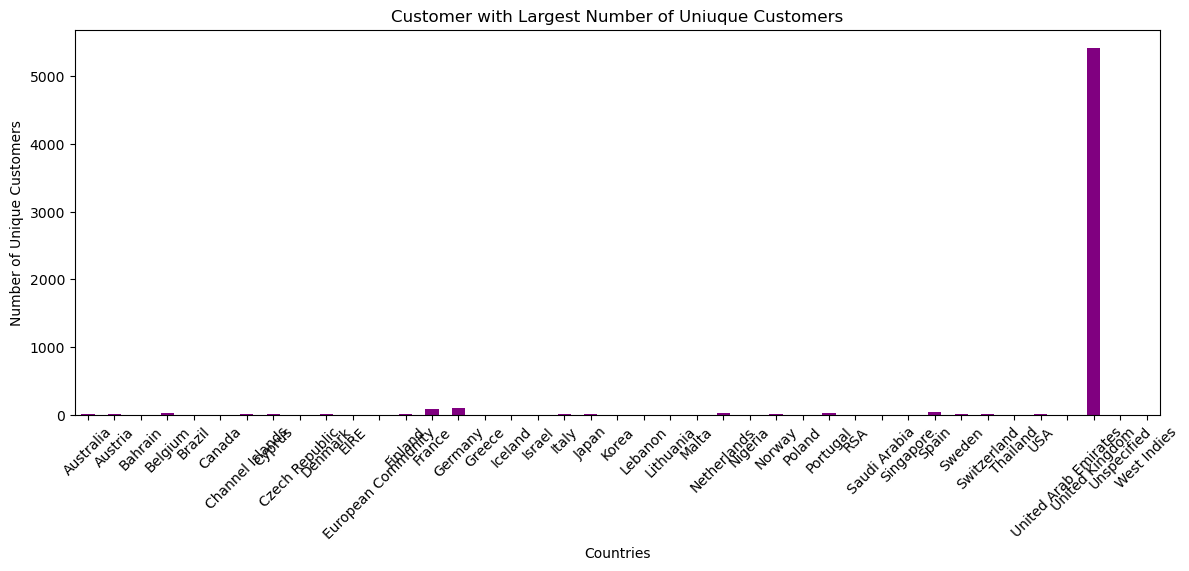

In [ ]:
plt.figure(figsize=(14,5))
df.groupby('Country')['Customer ID'].nunique().plot(kind='bar', color='purple')
plt.title('Customer with Largest Number of Uniuque Customers')
plt.xlabel('Countries')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.show()
# 그래프 추가 정리하기 LATER

### 문제 4. Acquisition (고객 유입 분석)

- 신규 고객 분석을 위해 고객의 **첫 구매 시점**을 기준으로 월별 신규 유입 고객 수를 계산
- 각 고객의 첫 구매 날짜를 추출하고, **월별 신규 고객 수**를 시각화

In [97]:
df['FirstPurchase'] = df.groupby('Customer ID')['InvoiceDate'].transform('min')


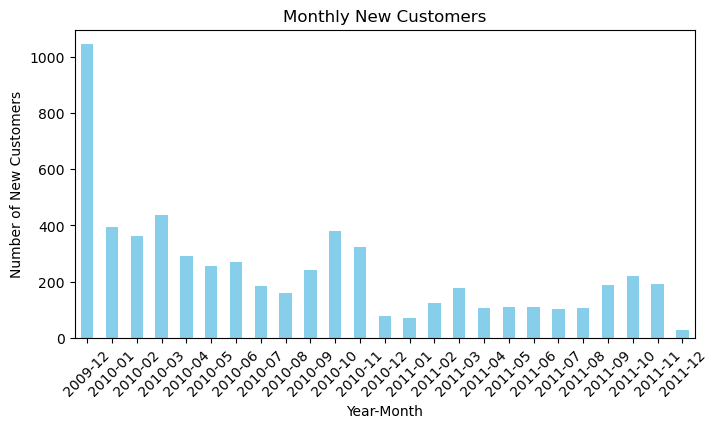

In [ ]:
plt.figure(figsize=(8,4))
df.groupby(by=df['FirstPurchase'].dt.to_period('M'))['Customer ID'].nunique().plot(kind='bar', color='skyblue')
plt.title('Monthly New Customers')
plt.xlabel('Year-Month')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)
plt.show() 

### 문제 5. Activation (고객 활성화 분석)

- 모든 고객 중 첫 구매 이후 **총 구매 금액이 특정 기준 금액 (£50)** 이상인 고객을 활성화된 고객으로 정의
- 전체 고객 수와 활성화된 고객 수를 비교하여 **활성화율**을 도출

In [163]:
total_users = df['Customer ID'].nunique()
activated_users = (df.groupby('Customer ID')['Total'].sum() >= 50).sum() 
activation_rate = activated_users / total_users
print(f"총 고객 수: {total_users}")
print(f"활성화된 고객 수: {activated_users}")
print(f"고객 활성화율: {activation_rate:.2%}")

총 고객 수: 5942
활성화된 고객 수: 5777
고객 활성화율: 97.22%


In [ ]:
df_old = df.copy() 

### 문제 6. Retention: 코호트 분석(고객)

- 분기별 활성 사용자(MAU)를 분석하여 고객 유지 현황을 파악
- 분기별 활성 고객 수를 계산하고, 이를 시각화하여 **고객 유지 트렌드**를 분석

In [166]:
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvocieDate,Total,FirstPurchase
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00,83.4,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,81.0,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,81.0,2009-12-01 07:45:00


In [219]:
df['is_activated'] = df.groupby('Customer ID')['Total'].transform('sum') >= 50

In [ ]:
df.is_activated.value_counts()


is_activated
True     823210
False      1154
Name: count, dtype: int64

In [233]:
not_activated = df[df['is_activated'] == False].index
dfa = df.copy()
dfa.drop(not_activated, inplace =True)
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 823210 entries, 0 to 1067370
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Invoice        823210 non-null  object        
 1   StockCode      823210 non-null  object        
 2   Description    823210 non-null  object        
 3   Quantity       823210 non-null  int64         
 4   InvoiceDate    823210 non-null  datetime64[ns]
 5   Price          823210 non-null  float64       
 6   Customer ID    823210 non-null  float64       
 7   Country        823210 non-null  object        
 8   InvocieDate    823210 non-null  datetime64[ns]
 9   Total          823210 non-null  float64       
 10  FirstPurchase  823210 non-null  datetime64[ns]
 11  current_q      823210 non-null  period[Q-DEC] 
 12  cohort_q       823210 non-null  period[Q-DEC] 
 13  quarter_diff   823210 non-null  int64         
 14  is_activated   823210 non-null  bool          
dtypes: b

In [234]:
dfa['current_q'] = pd.to_datetime(dfa['InvocieDate']).dt.to_period('Q')
dfa['cohort_q'] = dfa.groupby('Customer ID')['current_q'].transform('min')

def q_diff(dfa, col1, col2):
    current = dfa[col1]
    cohort = dfa[col2]
    return (current.dt.year - cohort.dt.year) * 4 + (current.dt.quarter - cohort.dt.quarter)

dfa['quarter_diff'] = q_diff(dfa, 'current_q', 'cohort_q')
dfa.tail(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvocieDate,Total,FirstPurchase,current_q,cohort_q,quarter_diff,is_activated
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00,16.60,2011-08-18 15:44:00,2011Q4,2011Q3,1,True
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09 12:50:00,14.85,2011-08-18 15:44:00,2011Q4,2011Q3,1,True
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,2011-12-09 12:50:00,18.00,2011-08-18 15:44:00,2011Q4,2011Q3,1,True


In [235]:
cohort_counts = dfa.groupby(['cohort_q', 'quarter_diff'])['Customer ID'].nunique()
cohort_counts_df = cohort_counts.to_frame().rename(columns = {'Customer ID' : 'customers'}).sort_values(by=['cohort_q'])
cohort_counts_df


customers
cohort_q quarter_diff           
2009Q4   0                  1017
         1                   668
         2                   685
         3                   618
         4                   710
         5                   524
         6                   517
         7                   509
         8                   571
2010Q1   7                   407
         6                   444
         5                   430
         4                   416
         0                  1152
         2                   573
         1                   607
         3                   606
2010Q2   4                   245
         6                   244
         3                   182
         5                   227
         1                   324
         0                   788
         2                   348
2010Q3   0                   562
         1                   275
         2                   148
         3                   155
         4                   192
         5                   188
2010Q4   4                   274
         3                   162
         2                   195
         0                   757
         1                   166
2011Q1   0                   369
         1                   159
         2                   125
         3                   136
2011Q2   0                   314
         1                   141
         2                   127
2011Q3   1                   207
         0                   389
2011Q4   0                   429

In [236]:
cohort_counts_df['retention_rate'] = cohort_counts_df['customers'] / cohort_counts_df.groupby(['cohort_q'])['customers'].transform('max')
cohort_counts_df

customers  retention_rate
cohort_q quarter_diff                           
2009Q4   0                  1017        1.000000
         1                   668        0.656834
         2                   685        0.673550
         3                   618        0.607670
         4                   710        0.698132
         5                   524        0.515241
         6                   517        0.508358
         7                   509        0.500492
         8                   571        0.561455
2010Q1   7                   407        0.353299
         6                   444        0.385417
         5                   430        0.373264
         4                   416        0.361111
         0                  1152        1.000000
         2                   573        0.497396
         1                   607        0.526910
         3                   606        0.526042
2010Q2   4                   245        0.310914
         6                   244        0.309645
         3                   182        0.230964
         5                   227        0.288071
         1                   324        0.411168
         0                   788        1.000000
         2                   348        0.441624
2010Q3   0                   562        1.000000
         1                   275        0.489324
         2                   148        0.263345
         3                   155        0.275801
         4                   192        0.341637
         5                   188        0.334520
2010Q4   4                   274        0.361955
         3                   162        0.214003
         2                   195        0.257596
         0                   757        1.000000
         1                   166        0.219287
2011Q1   0                   369        1.000000
         1                   159        0.430894
         2                   125        0.338753
         3                   136        0.368564
2011Q2   0                   314        1.000000
         1                   141        0.449045
         2                   127        0.404459
2011Q3   1                   207        0.532134
         0                   389        1.000000
2011Q4   0                   429        1.000000

In [237]:
cohorts_pivot = cohort_counts_df.pivot_table(index='cohort_q', columns = 'quarter_diff', values = 'retention_rate')
cohorts_pivot

quarter_diff,0,1,2,3,4,5,6,7,8
cohort_q,,,,,,,,,
2009Q4,1.0,0.656834,0.673550,0.607670,0.698132,0.515241,0.508358,0.500492,0.561455
2010Q1,1.0,0.526910,0.497396,0.526042,0.361111,0.373264,0.385417,0.353299,NaN
2010Q2,1.0,0.411168,0.441624,0.230964,0.310914,0.288071,0.309645,NaN,NaN
2010Q3,1.0,0.489324,0.263345,0.275801,0.341637,0.334520,NaN,NaN,NaN
2010Q4,1.0,0.219287,0.257596,0.214003,0.361955,NaN,NaN,NaN,NaN
2011Q1,1.0,0.430894,0.338753,0.368564,NaN,NaN,NaN,NaN,NaN
2011Q2,1.0,0.449045,0.404459,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,1.0,0.532134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


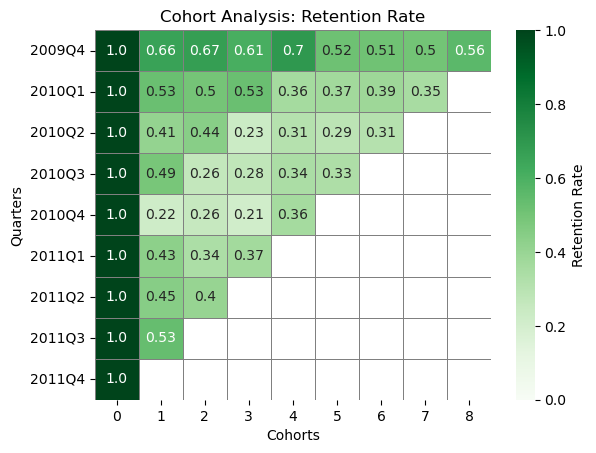

In [238]:
heatmap = sns.heatmap(
    data=cohorts_pivot,
    annot=True,                # 셀 내부에 값 표시
    fmt='.2',                 # 텍스트 형식 (소수점 2자리)
    cmap='Greens',             # 색상 팔레트
    cbar_kws={'label': 'Retention Rate'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0, vmax=1           # Retention Rate의 범위 설정
)

plt.title('Cohort Analysis: Retention Rate')
plt.xlabel('Cohorts')
plt.ylabel('Quarters')
plt.show() 


# 그래프 추가 정리 LATER

### 문제 7. Retention: 코호트 분석(평균 구매수량)

- 분기단위의 활성 사용자의 평균 구매수량을 분석
    - 구매수량이기 때문에 0 index의 값이 100% 가 아닌 절대 값임을 주의

In [239]:
dfa.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvocieDate,Total,FirstPurchase,current_q,cohort_q,quarter_diff,is_activated
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00,83.4,2009-12-01 07:45:00,2009Q4,2009Q4,0,True
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,81.0,2009-12-01 07:45:00,2009Q4,2009Q4,0,True
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,81.0,2009-12-01 07:45:00,2009Q4,2009Q4,0,True


In [245]:
dfa['avg_quantity'] = dfa.groupby('Customer ID')['Quantity'].transform('mean').round(1)
dfa.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvocieDate,Total,FirstPurchase,current_q,cohort_q,quarter_diff,is_activated,avg_quantity
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00,83.4,2009-12-01 07:45:00,2009Q4,2009Q4,0,True,9.1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,81.0,2009-12-01 07:45:00,2009Q4,2009Q4,0,True,9.1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,81.0,2009-12-01 07:45:00,2009Q4,2009Q4,0,True,9.1


In [ ]:

cohort_quant = dfa.groupby(['cohort_q', 'quarter_diff'])['avg_quantity'].mean()
cohort_quant_df = cohort_quant.to_frame().sort_values(by=['cohort_q']).round(1)
# cohort_quant_df = cohort_quant.to_frame().rename(columns = {'Customer ID' : 'customers'}).sort_values(by=['cohort_q']).round(1)
cohort_quant_df

avg_quantity
cohort_q quarter_diff              
2009Q4   0                     12.7
         1                     19.8
         2                     14.3
         3                     14.9
         4                     13.1
         5                     16.2
         6                     16.1
         7                     16.5
         8                     13.9
2010Q1   7                      9.7
         6                     12.5
         5                     11.2
         4                     11.0
         0                     10.4
         2                     11.2
         1                     13.0
         3                      9.8
2010Q2   4                     14.7
         6                      9.8
         3                     14.9
         5                     15.3
         1                     11.3
         0                     11.1
         2                      9.3
2010Q3   0                     14.0
         1                      8.9
         2                     11.1
         3                     10.2
         4                     12.6
         5                     10.2
2010Q4   4                      8.3
         3                      9.0
         2                      8.3
         0                      7.8
         1                      8.8
2011Q1   0                     10.2
         1                     15.0
         2                     12.3
         3                      9.7
2011Q2   0                      9.4
         1                     10.7
         2                      8.7
2011Q3   1                      6.2
         0                      9.3
2011Q4   0                      8.6

In [251]:
cohorts_quant_pivot = cohort_quant_df.pivot_table(index='cohort_q', columns = 'quarter_diff', values = 'avg_quantity')
cohorts_quant_pivot 

quarter_diff,0,1,2,3,4,5,6,7,8
cohort_q,,,,,,,,,
2009Q4,12.7,19.8,14.3,14.9,13.1,16.2,16.1,16.5,13.9
2010Q1,10.4,13.0,11.2,9.8,11.0,11.2,12.5,9.7,NaN
2010Q2,11.1,11.3,9.3,14.9,14.7,15.3,9.8,NaN,NaN
2010Q3,14.0,8.9,11.1,10.2,12.6,10.2,NaN,NaN,NaN
2010Q4,7.8,8.8,8.3,9.0,8.3,NaN,NaN,NaN,NaN
2011Q1,10.2,15.0,12.3,9.7,NaN,NaN,NaN,NaN,NaN
2011Q2,9.4,10.7,8.7,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,9.3,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


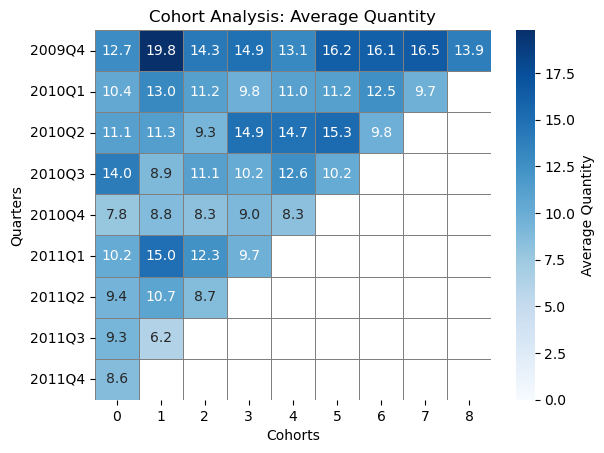

In [253]:
heatmap = sns.heatmap(
    data=cohorts_quant_pivot ,
    annot=True,                # 셀 내부에 값 표시
    fmt='.1f',                 # 텍스트 형식 (소수점 1자리)
    cmap='Blues',              # 색상 팔레트
    cbar_kws={'label': 'Average Quantity'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0                     # 최소값 설정 (필요 시 조정 가능)
)

plt.title('Cohort Analysis: Average Quantity')
plt.xlabel('Cohorts')
plt.ylabel('Quarters')
plt.show() 

### 문제 8. Revenue : ARPU

- 각 고객의 월별 구매 금액을 집계하고, 이를 기반으로 ARPU를 분석

In [256]:
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate,Total,FirstPurchase,current_q,cohort_q,quarter_diff,is_activated
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00,83.4,2009-12-01 07:45:00,2009Q4,2009Q4,0,True
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,81.0,2009-12-01 07:45:00,2009Q4,2009Q4,0,True
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,81.0,2009-12-01 07:45:00,2009Q4,2009Q4,0,True


In [255]:
df = df.rename({'InvocieDate': 'InvoiceDate'}, axis = 1)

In [264]:
df = df.loc[:, ~df.columns.duplicated()]
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,FirstPurchase,current_q,cohort_q,quarter_diff,is_activated
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01 07:45:00,2009Q4,2009Q4,0,True
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01 07:45:00,2009Q4,2009Q4,0,True
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01 07:45:00,2009Q4,2009Q4,0,True


In [265]:
df['purchase_month'] = df['InvoiceDate'].dt.to_period('M')

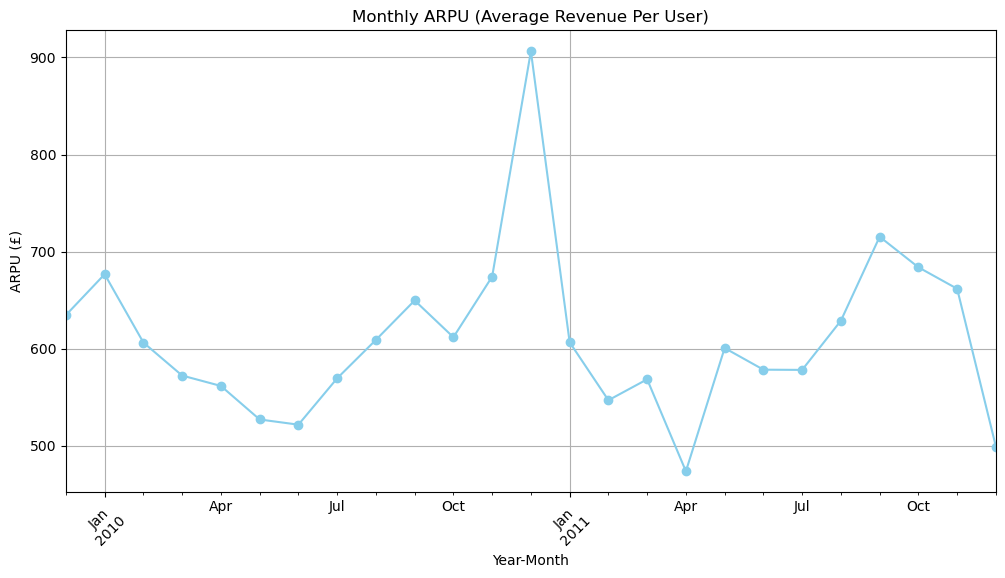

In [269]:
monthly_revenue = df.groupby('purchase_month')['Total'].sum()
monthly_users = df.groupby('purchase_month')['Customer ID'].nunique()
monthly_arpu = monthly_revenue / monthly_users

#시각화코드
plt.figure(figsize=(12, 6))
monthly_arpu.plot(kind='line', marker='o', color='skyblue')
plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 문제 9. Revenue(CLV)

- 고객 생애 가치를 예측하기 위해 **CLV**를 계산하고 표로 CLV기준으로 내림차순으로 정렬
- **CLV 식: 평균금액 x  평균 구매 빈도 x 고객유지기간**(단, Invoce Date의 최대 최소를 빼준 뒤 1을 더해주기)

In [270]:
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,FirstPurchase,current_q,cohort_q,quarter_diff,is_activated,purchase_month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01 07:45:00,2009Q4,2009Q4,0,True,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01 07:45:00,2009Q4,2009Q4,0,True,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01 07:45:00,2009Q4,2009Q4,0,True,2009-12


In [273]:
customer_data = df.groupby('Customer ID').agg({
    'Invoice': 'nunique',        # 구매 횟수
    'Total': 'sum',           # 총 지출 금액
    'InvoiceDate': ['min', 'max']  # 첫 구매일과 마지막 구매일
}).reset_index()
customer_data.columns = ['Customer ID', 'PurchaseFrequency', 'TotalRevenue', 'FirstPurchaseDate', 'LastPurchaseDate']
customer_data.head(3)

,Customer ID,PurchaseFrequency,TotalRevenue,FirstPurchaseDate,LastPurchaseDate
0,12346.0,17,-64.68,2009-12-14 08:34:00,2011-01-18 10:17:00
1,12347.0,8,5633.32,2010-10-31 14:20:00,2011-12-07 15:52:00
2,12348.0,5,2019.40,2010-09-27 14:59:00,2011-09-25 13:13:00


In [275]:
customer_data['CustomerLifetime'] = ((customer_data['LastPurchaseDate'] - customer_data['FirstPurchaseDate']).dt.days) + 1

In [276]:
customer_data['AverageOrderValue'] = customer_data['TotalRevenue'] / customer_data['PurchaseFrequency']

In [277]:
customer_data['CLV'] = customer_data['AverageOrderValue'] * customer_data['PurchaseFrequency'] * (customer_data['CustomerLifetime'] / 365)

In [282]:
customer_data.sort_values('CLV', ascending = False).round(2)

# PurchaseFrequency가 평균 빈도 이려면 전체 구매 건수가 아닌, 연간 평균 구매 횟수로 변경되어야 하지 않을까? check LATER

,Customer ID,PurchaseFrequency,TotalRevenue,FirstPurchaseDate,LastPurchaseDate,CustomerLifetime,AverageOrderValue,CLV
5756,18102.0,153,598215.22,2009-12-01 09:24:00,2011-12-09 11:50:00,739,3909.90,1211180.95
2300,14646.0,164,523342.07,2009-12-02 16:52:00,2011-12-08 12:12:00,736,3191.11,1055287.02
1810,14156.0,202,296564.69,2009-12-01 12:30:00,2011-11-30 10:54:00,729,1468.14,592316.87
2565,14911.0,510,270248.53,2009-12-01 11:41:00,2011-12-08 15:54:00,738,529.90,546420.32
1348,13694.0,164,190825.52,2009-12-04 15:26:00,2011-12-06 09:32:00,732,1163.57,382696.66
...,...,...,...,...,...,...,...,...
1867,14213.0,2,-1192.20,2010-10-31 10:37:00,2010-12-03 09:47:00,33,-596.10,-107.79
1430,13776.0,8,-340.17,2010-01-26 16:51:00,2010-10-07 16:59:00,255,-42.52,-237.65
745,13091.0,6,-130.22,2009-12-08 12:25:00,2011-11-18 16:48:00,711,-21.70,-253.66
3067,15413.0,7,-2531.38,2009-12-01 10:18:00,2010-10-05 15:15:00,309,-361.63,-2143.00


### 기초 통계 문제

문제 10. 어떤 회사의 고객 대기시간은 5분에서 15분 사이의 균등분포를 따릅니다. 고객 100명이 대기한 시간을 시뮬레이션하고, 평균 대기시간과 표준편차를 계산하세요.

In [288]:
from scipy.stats import uniform


waiting_times = uniform.rvs(size=100, loc=5, scale=15, random_state=0)
print(f'평균 대기 시간: {np.mean(waiting_times).round(2)}')
print(f'표준 편차: {np.std(waiting_times, ddof=1).round(2)}')

평균 대기 시간: 12.09
표준 편차: 4.35


문제 11. 한 신제품의 초기 성공 확률이 0.3이라고 가정합니다. 10회의 시뮬레이션에서 성공한 횟수를 구하고, 각 성공 여부를 출력하세요.

In [289]:
from scipy.stats import bernoulli

p = 0.3
n = 10

outcomes = bernoulli.rvs(p, size=n)
success_count = outcomes.sum()

print(f"성공 횟수: {success_count}")
print(f"각 성공 여부: {outcomes}")

성공 횟수: 3
각 성공 여부: [0 0 0 0 0 1 0 1 1 0]


문제 13. 한 공장에서 생산되는 제품의 무게는 평균 50g, 표준편차 5g의 정규분포를 따릅니다.  
1000개의 제품 무게를 시뮬레이션하고, 무게가 45g 이상 55g 이하인 제품의 비율을 계산(변수명: within_range)하세요. 무게 분포의 히스토그램을 그리세요. 

In [290]:
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = 50
sigma = 5
num_of_samples = 1000

weights = norm.rvs(loc=mu, scale=sigma, size=num_of_samples, random_state=0)

conds = (weights >= 45) & (weights <=55)

within_range = len(weights[conds]) / len(weights)
print(f'45g 이상 55g 이하 비율: {within_range:.2f}')

45g 이상 55g 이하 비율: 0.70


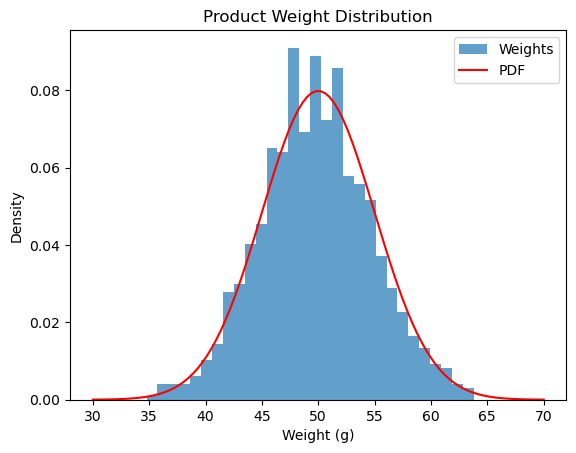

45g 이상 55g 이하 비율: 69.90%


In [291]:
plt.hist(weights, bins=30, density=True, alpha=0.7, label="Weights")
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label="PDF")
plt.xlabel("Weight (g)")
plt.ylabel("Density")
plt.title("Product Weight Distribution")
plt.legend()
plt.show()

print(f"45g 이상 55g 이하 비율: {within_range:.2%}")